In [1]:
import sys, os
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import ttest_ind_from_stats
from scipy.spatial import distance
import random
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
np.random.seed(0)
# random.seed(0)

In [2]:
dataset = pd.read_csv('digits-embedding.csv', header=None)
#print dataset
X = []
L = []
for i in range(10):
    current = dataset[dataset[1] == i]
    l = np.random.choice(len(current), 10)
    print len(current)
    for j in l:
        X.append([current.iloc[j][2], current.iloc[j][3]])
        L.append(j)
print np.array(X)

1994
2281
1929
2076
1945
1775
1971
2093
1922
2014
[[-30.02106156  17.48012346]
 [-31.64480412   4.86358518]
 [-36.7986069    9.71960023]
 [-23.46571548  13.28324931]
 [-31.60563159   6.82528807]
 [-28.68945351   8.12208636]
 [-33.22099498  21.31400923]
 [-39.06047798   7.46566518]
 [-31.90449112  23.89791647]
 [-35.04219467  23.64156267]
 [ 10.59602201 -21.49238111]
 [ 12.53339771  25.49846805]
 [ 10.59633808 -15.66362597]
 [  9.70906467   2.78980681]
 [ 10.14332383  16.4231397 ]
 [  7.55851482 -17.4020239 ]
 [  3.10963338   5.13800401]
 [  8.57585447  26.52634827]
 [  8.78931295  20.62762377]
 [  9.53303988  11.95241845]
 [-11.66785299  33.89554966]
 [ -6.97932982  30.02781187]
 [  2.72029682   1.77849236]
 [-12.33483904  31.45977509]
 [-14.71440226  29.86502238]
 [-19.46350848  29.60921476]
 [-14.9013425   28.42654271]
 [  1.51318291   2.81771165]
 [-15.14096636  30.89414625]
 [ -2.17393207  30.46801399]
 [ -9.19936876   3.74291864]
 [-10.32634285  15.48370283]
 [-11.24606801  13.969

In [3]:
# def stratified_sample(arr, k):
#     a = arr[arr[:, 1].argsort()]
#     strata = np.split(a, np.where(np.diff(a[:, 1]))[0] + 1)
#     samples = [random.sample(stratum, k) for stratum in strata]
#     return np.vstack(samples)
# data = stratified_sample(np.array(dataset), 10)

In [4]:
# X, L = data[:, 2:], data[:, 1].astype(int)
# # print X

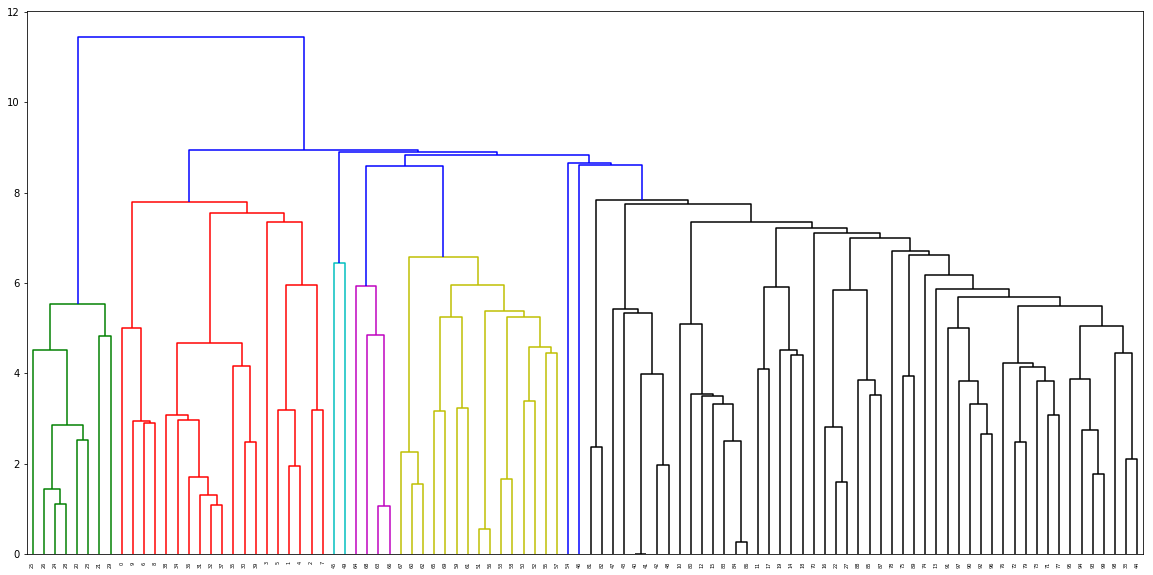

In [5]:
Z = linkage(X, 'single')
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z)
plt.savefig('./dendrogram_single.png')

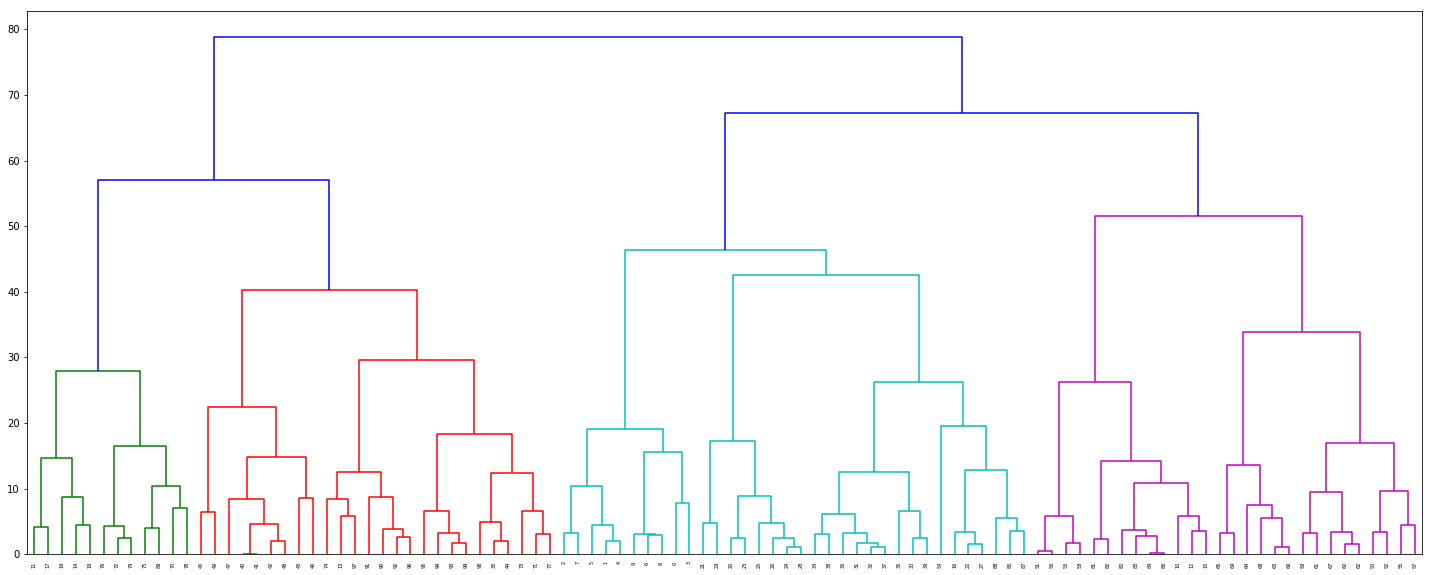

In [6]:
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.savefig('./dendrogram_complete.png')

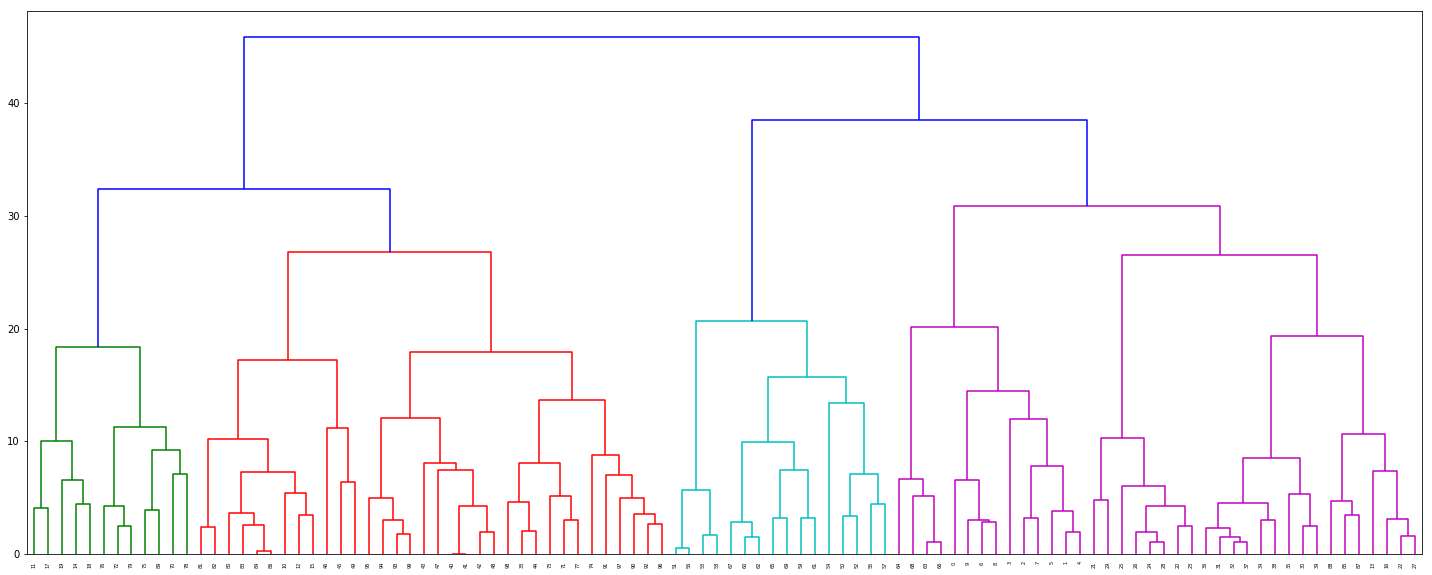

In [7]:
Z = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.savefig('./dendrogram_average.png')

In [8]:
cut = scipy.cluster.hierarchy.fcluster(Z, 10, criterion='maxclust')

In [9]:
print cut

[ 7  7  7  7  7  7  7  7  7  7  2  1  2 10  1  2 10  1  1  1  8  8 10  8
  8  8  8 10  8  8  9  9  9  3  9  9  9  9  9  9  3  3  3  3  3  2  2  3
  3  2  5  4  5  4  5  5  4  5  4  5  5  5  5  6  6  5  6  5  6  5  1  3
  1  3  3  1  1  3  1  1  2  2  2  2  2 10  2 10 10  1  3  3  3  3  3  3
  3  3  3  3]
